## Simple Linear Regression using the scikit learn library (Important)

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# Reading the data

pd.read_csv("height-weight.csv")

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [3]:
# Reading the data and storing under the df variable

df= pd.read_csv("height-weight.csv")

In [4]:
df.shape

(23, 2)

In [5]:
df.sample(10)

,Weight,Height
18,76,150
21,56,140
19,87,167
11,95,182
6,80,163
16,50,140
3,60,145
0,45,120
5,78,162
14,85,170


<Axes: xlabel='Weight', ylabel='Height'>

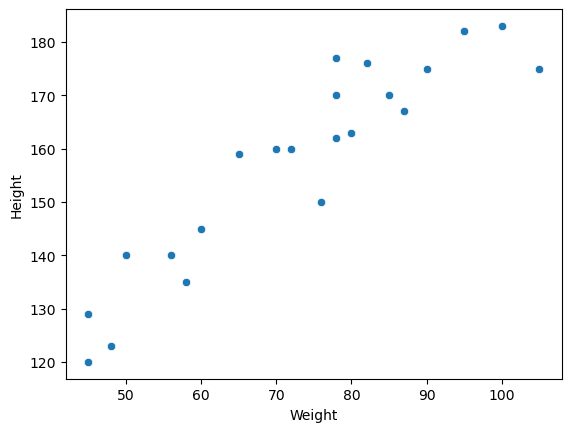

In [6]:
# Plot a scatter plot and understand the relationship between the weight and height features

sns.scatterplot(x="Weight",y="Height",data=df)

# plt.scatter(x="Weight",y="Height",data=df)

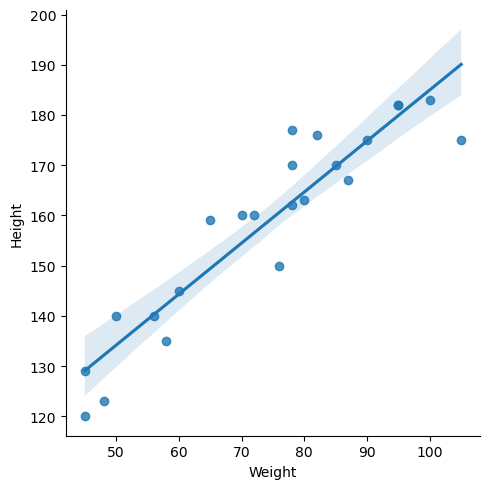

In [7]:
# plt.scatter(x=df["Weight"],y=df["Height"])
sns.lmplot(x="Weight",y="Height",data=df)

# Simple way to plot the regression line using the lmplot for the given data

## Important steps to proceed with machine learining process

In [8]:
# 1. Initially divide the independent features and dependent features
# 2. Perform the test train split
# 3. Standardize the data
# 4. Train the model using simple linear regression model

In [9]:
# 1. Initially divide the independent features and dependent features

# the below x and y create 1d structure
# X=df.loc[:,"Weight"] # Independent feature "Weight"
# y=df.iloc[:,1] # Dependent feature "Height"

# the below x and y creates 2D dataframe, while standardizing the features we need 2d dataframe.

X= df[["Weight"]]  # Independent feature "Weight"
y=df[["Height"]] # Dependent feature "Height"

In [10]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [11]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


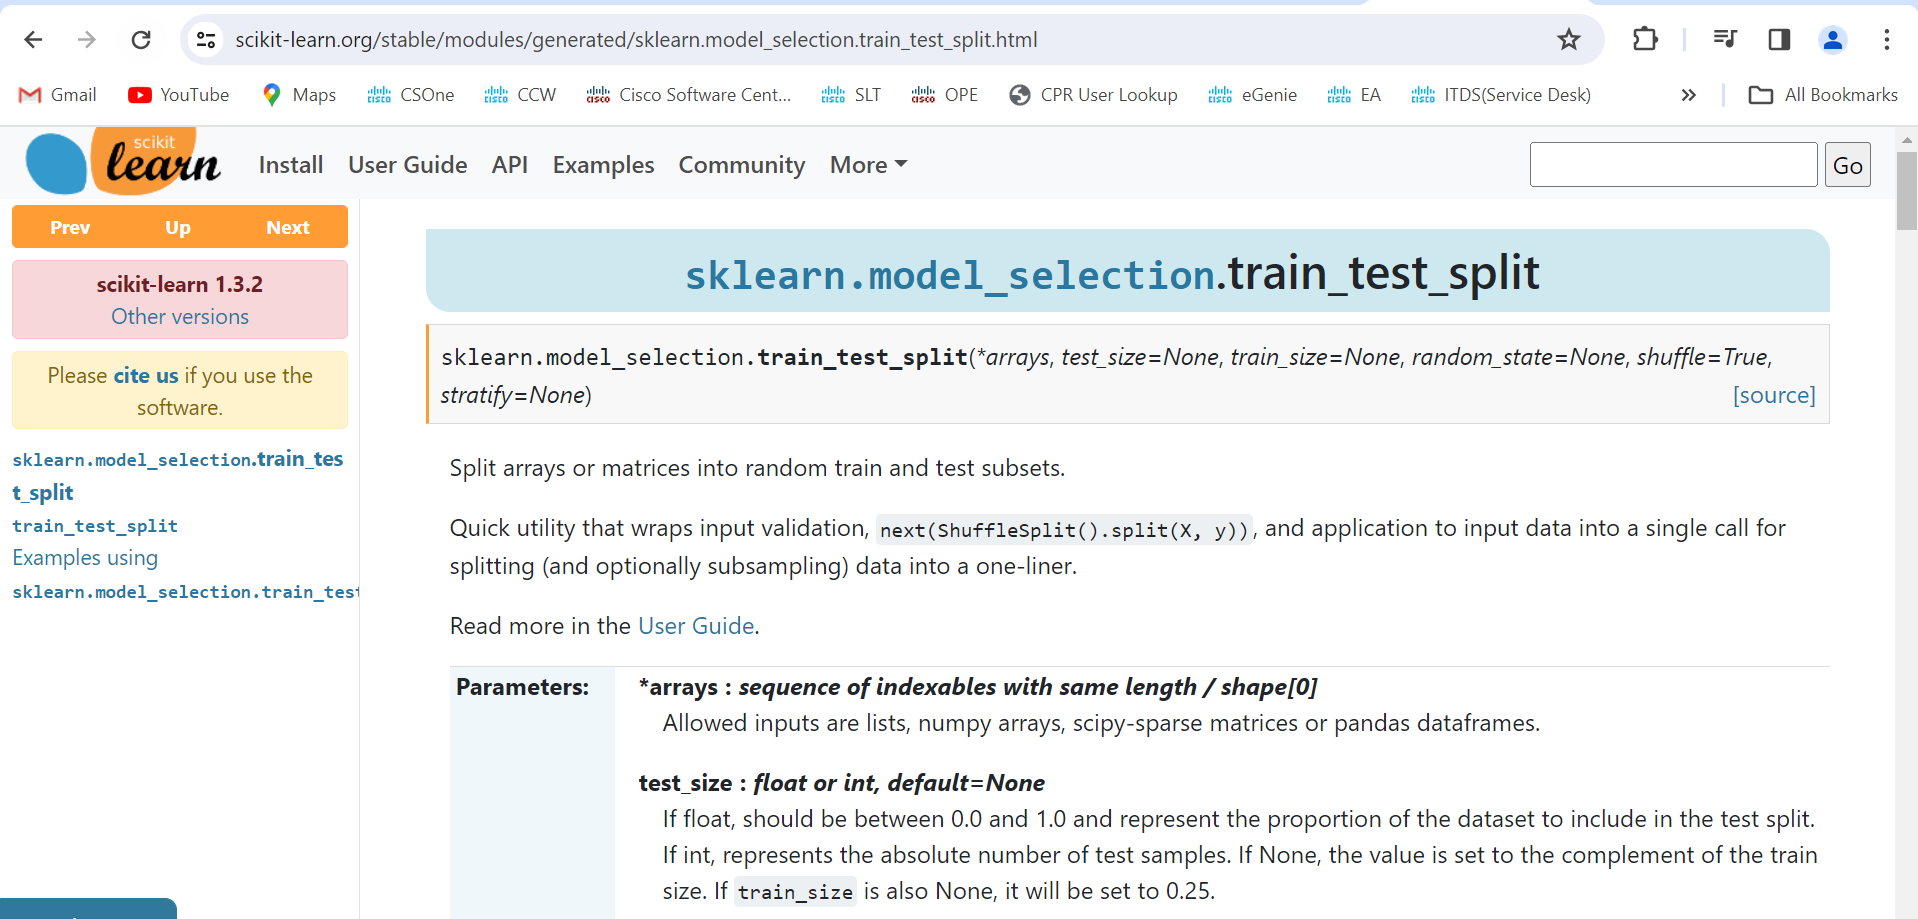

In [12]:
# 2. Performing the train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.30,train_size=0.70,random_state=42)

# Total records are 23
# test_size=0.30 that means 30% of total records (23) will be divided as test data
# train_size=0.70 means 70% of total records(23) will be divided as train data
# 30% of 23 are 6.9 --> test data will have 7 records
# 70% of 23 are 16.1 --> training data will have 16 records 

In [13]:
X_train

,Weight
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50
21,56


In [14]:
X_train.shape #  Training data count

(16, 1)

In [15]:
X_test.shape # Testing data count

(7, 1)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16, 1), (7, 1), (16, 1), (7, 1))

In [17]:
# 3. Standardize the data

# As our data is in different units like height is calculated in cms/m/feet and weight is calculated in kgs/pounds. So it is 
# best decision to scale down the values of both features so that both features won't have any units once we standardized 
# because during standardization we divide the values with same unit.
# For example if you are doing standardization to height feature and height is in cm's.
# standardization=( x-mean/ sigma ), 
# (x- mean) and sigma has same unit as height i,e cm's
# so, cm/cm ==> Resultant value will be Unitless

# If we standardize the features,gradient descent will happen quickly. --> Important 

# Standardization required for optimization algo and distance based algorithms , for some algorithms standardization is not required

In [18]:
# Standardization is often necessary for machine learning algorithms that rely on distance-based metrics or optimization methods.
# The reason for standardization is to ensure that all features contribute equally to the model fitting process and prevent one
# feature from dominating due to its scale. Here are some machine learning algorithms that commonly benefit from standardization


# K-Nearest Neighbors (KNN):

# KNN calculates distances between data points to make predictions.
# Standardizing features ensures that the scale of each feature does not disproportionately impact the distance calculations.
# Support Vector Machines (SVM):

# SVM aims to find the hyperplane that best separates classes.
# Standardization is crucial to make sure that all features have similar scales, preventing features with larger magnitudes from dominating the decision boundary.
# Principal Component Analysis (PCA):

# PCA identifies the principal components by maximizing variance.
# Standardization is important to give equal weight to all features during the variance-capturing process.
# Gradient Descent-Based Algorithms:

# Algorithms like linear regression, logistic regression, and neural networks that use gradient descent are sensitive to feature scales.
# Standardization ensures faster convergence during optimization.
# K-Means Clustering:

# K-Means relies on distance metrics to assign data points to clusters.
# Standardization prevents features with larger scales from having a disproportionate impact on the clustering process.
# Linear Discriminant Analysis (LDA):

# LDA, similar to PCA, involves calculating covariance matrices and eigenvectors.
# Standardization ensures that the covariance matrices are not dominated by features with larger scales.
# Neural Networks:

# Neural networks often use optimization algorithms like gradient descent.
# Standardization ensures that the learning process is efficient and features contribute equally to the weight updates.
# Ridge and Lasso Regression:

# Regularized regression techniques like Ridge and Lasso are sensitive to feature scales.
# Standardization helps in preventing regularization from being biased toward features with larger magnitudes.
# Remember, not all algorithms require standardization. Tree-based algorithms like Decision Trees and Random Forests, for instance, are generally insensitive to feature scales. Always check the documentation or experiment with your specific dataset to determine the impact of standardization on the performance of your chosen algorithm.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [20]:
# Standardize the train independent feature (X_train)

scaler.fit_transform(X_train)

# Here the fit will calculate the mean and standard deviation of the data, and transform will apply the standardization 
# formula to each and every record of x_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

In [21]:
X_train=scaler.fit_transform(X_train)

# Now we need to standardize the x_test data as well, now we use transform only why because we need to consider the mean and 
# standard deviation of train data to apply the standardization to test data. So Initailly we have applied standardization to
# the x_train data so, mean and std dev stored in the scaler object now we need to tranform the test data using those details.

X_test= scaler.transform(X_test) # transform will use the mean and std dev of the x_train data and proceed with standardization
                                 # of x_test data



In [22]:
X_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

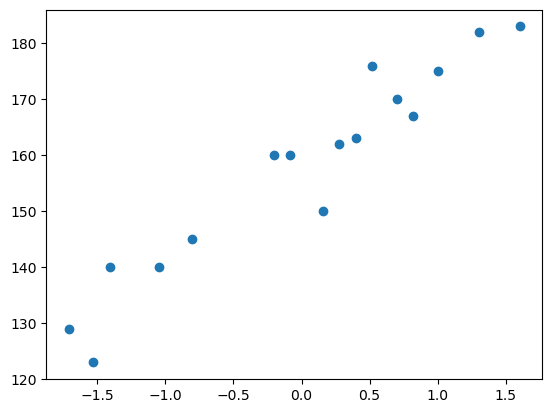

In [23]:
# Now plot X_train vs y_train

plt.scatter(X_train,y_train)

# As you know we didn't standardized the values of train dependent variable y_train. we only standardized the X_train, X_test

# As you can see the scale of x-axis is reduced due to standardization

In [24]:
# Train the simple linear model 
# Why simple linear model --> beacuse we have only one independent feature to predict the dependent feature

from sklearn.linear_model import LinearRegression

In [25]:
regressor= LinearRegression()

In [26]:
regressor.fit(X_train, y_train)

# Here we fit the data that means it will calculate the intercept value, co-efficient values (slope) in the regressor object

LinearRegression()

In [27]:
# the intercept value i,e y=wx+b or hθ(x)=θ0+θ1x

# b or θ0 are called Intercept

print("The intercept value of weight featire is:",regressor.intercept_)

The intercept value of weight featire is: [157.8125]


In [28]:
regressor.get_params() # Parameters which we used while initializing the linear regressor

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
# Slope or Co-efficient values
# w or θ1 value

print("The slope or co-efficent value of weight feature is:",regressor.coef_)

# we have only one independent variable so we got one co-efficient value

# In multi-linear regression we will get the multiple slope or co-efficient values because we have multiple independent features 
# to predict the dependent feature.

The slope or co-efficent value of weight feature is: [[17.03207732]]


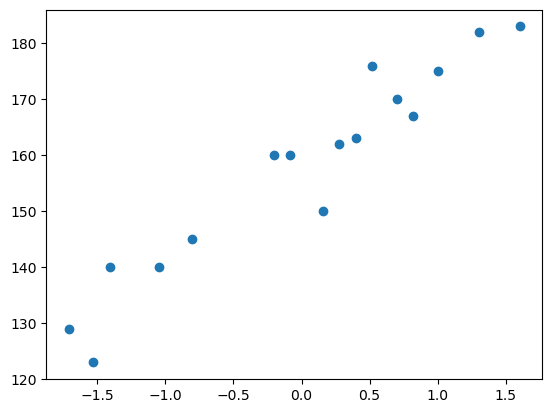

In [30]:
plt.scatter(X_train,y_train)

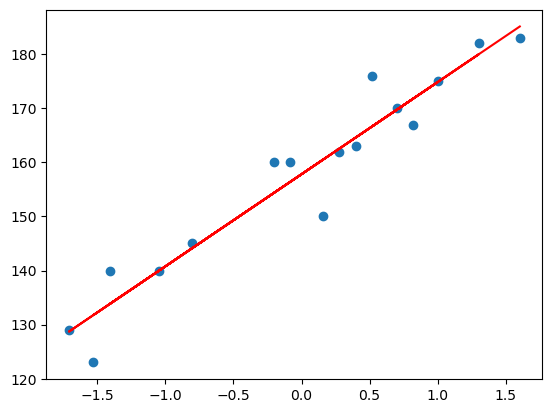

In [31]:
# Creating the best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),c="r")
# we can use the below syntax as well instead of above.
# plt.plot(X_train,regressor.intercept_ + (regressor.coef_*X_train))

plt.show()

# we have X_train and we predicted the output values for X_train data.

# prediction is calculated with the intercept and the slope values which are stored in the regressor object

# predicted value = hθ(x)= θ0+θ1x

# θ0=157.8125 , θ1= 17.03207732,x1=1.60377199 (first value of x_train) , hθ(x)= 157.8125+ (17.03207732*1.60377199) = 185.12806848
# Using this process teh predict module will find all the values
# Finally we plotted X_train and predicted values for X_train

In [32]:
regressor.predict(X_train)

# Below is the implementation for the aboev predict module

# regressor.intercept_ + (regressor.coef_*X_train)

array([[185.12806848],
       [162.55745791],
       [131.77935257],
       [179.99838426],
       [128.70154204],
       [144.0905947 ],
       [154.34996315],
       [160.50558422],
       [133.83122626],
       [139.98684733],
       [156.40183684],
       [174.86870004],
       [166.66120528],
       [169.73901582],
       [171.79088951],
       [164.60933159]])

In [33]:
X_train

array([[ 1.60377199],
       [ 0.2785895 ],
       [-1.52847753],
       [ 1.30259415],
       [-1.70918423],
       [-0.80565072],
       [-0.20329504],
       [ 0.15811836],
       [-1.40800639],
       [-1.04659299],
       [-0.08282391],
       [ 1.00141631],
       [ 0.51953177],
       [ 0.70023847],
       [ 0.82070961],
       [ 0.39906064]])

In [34]:
y_train

# y_train values will match with the predicted values of X_train, why because we trained the model with X_train and y_train
# data now we again predicted the values for X_train data itself

,Height
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150
16,140
21,140


In [35]:
## Summary

### Prediction of train data

# Predicted output of height = intercept_+ coef_(Weight)

# y_pred_train= 157.8125+ (17.03207732*X_train)

### Similarly prediction of test data

# Predicted output of height = intercept_+ coef_(Weight)

# y_pred_train= 157.8125+ (17.03207732*X_test)

In [36]:
## Predict the output for X_test values

y_pred_test= regressor.intercept_+(regressor.coef_*X_test)

# or

y_pred_test= regressor.predict(X_test)

In [37]:
y_pred_test

array([[162.55745791],
       [162.55745791],
       [128.70154204],
       [179.99838426],
       [149.22027893],
       [190.25775271],
       [142.03872102]])

In [38]:
## The above are the predicted values for X_test data, But we already have a actual output of the X_test data under the y_test
y_test

,Height
15,177
9,170
0,120
8,182
17,159
12,175
1,135


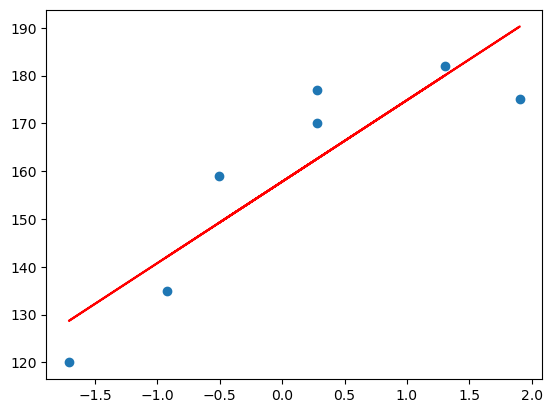

In [39]:
# Visualizing the best fit line for the test data

plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),c="r")
# we can use the below syntax as well instead of above.
# plt.plot(X_test,regressor.intercept_ + (regressor.coef_*X_test))

plt.show()

## Performance metrics to compare predicted values and the actual values

In [40]:
## Now we need to compare y_pred_test (predicted output) and y_test (actual output) using performance metrics so that we can 
# understand the model performance and accuracy.

In [41]:
# The performance metrics for regression alogorithm are

# 1. MAE
# 2. MSE
# 3. RMSE = It is square root of MSE
# 4. R-square
# 5. Adjusted R-square

In [42]:
## MAE, MSE, RMSE

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae= mean_absolute_error(y_pred_test,y_test)
mse= mean_squared_error(y_pred_test,y_test)
rmse= np.sqrt(mse)

print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

Mean absolute error: 9.237776679921925
Mean squared error: 103.09818711844574
Root mean squared error: 10.153727744944009


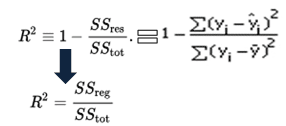

In [43]:
## R-squared

from sklearn.metrics import r2_score

print(r2_score(y_pred_test,y_test))

score= r2_score(y_pred_test,y_test)

0.7369789043073507


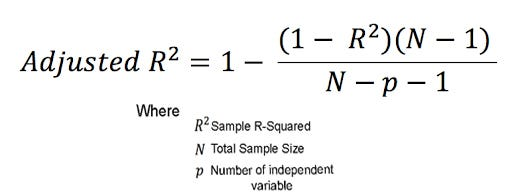

In [44]:
## Adjusted R square

## 

adj_r_square = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [45]:
adj_r_square

0.6843746851688208

In [46]:
## As we know the adjusted r square values always less than the R squared value (explained in the maths intution)
# why beacuse adjusted r square error will change based on the correlation of the independent feature on dependent feature.
# Refer theroy for the more information

In [47]:
# Till now we have discussed how to train our model using training data and how to test the model performance using the test
# data. Now if you want to predict the new outside data (other than test data) then we have to perform the below steps:

## Predicting the output for the new unseen data (Other than test data)

In [48]:
# As we know the regressor is the object for our model

regressor

LinearRegression()

In [49]:
## You got a new data point of weight = 80, Now you need to predict the height for this weight

## As we scaled down the features initially we need to perform the standardization for the new data as well with the same 
# data (mean and std dev of the x_train data). As we know the mean and std dev of the training data is stored in the scaler obje
# -ct when we fit the data using scaler object ***.

In [50]:
scaled_weight=scaler.transform([[80]])

C:\Users\nekarri\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
scaled_weight

array([[0.39906064]])

In [52]:
## The scaled weight is 0.39906064. Now we will predict the output feature height for this 0.39906064 value

In [53]:
print("The height prediction for weight 80 kgs is:",regressor.predict(scaled_weight)[0][0])

The height prediction for weight 80 kgs is: 164.6093315947616


In [54]:
# Our machine learning model predicts that height for the given weight=80 is 164.60933168.

## Assumptions

1. Predicted values vs test values will follow the linearity

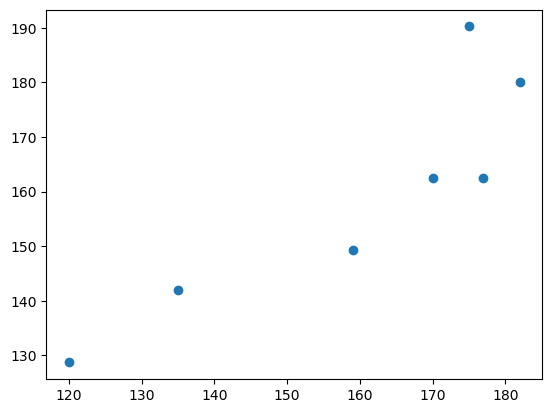

In [55]:
# 1. Predicted values vs test values will follow the linearity

# Plot a scatterplot between y_test vs y_pred_test

plt.scatter(y_test,y_pred_test)

In [56]:
## If our model performs well on the data then scatter plot between y_test and y_pred_test will be in the straight line because 
## when our prediction values are same as y_test then only we can say our model predicting the outcomes in correct way. But here
# there is slight mismatch in the y_test and y_pred_test values. so our model not that much good here.

## If model predicts the values as same as y_test values (some data points are plotted in linear but some points are not)
# then scatter plot between y_test and y_pred will form linear line (Basic:)

2. Distribution of residuals (test - predicted) i,e yi- yhat will follow the **normal distribution**

In [57]:
residuals= y_test-y_pred_test

print(residuals)

       Height
15  14.442542
9    7.442542
0   -8.701542
8    2.001616
17   9.779721
12 -15.257753
1   -7.038721


C:\Users\nekarri\AppData\Local\Temp\ipykernel_5468\1395055174.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

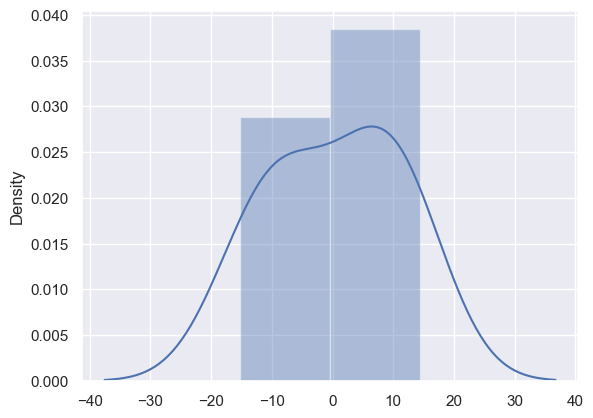

In [58]:
## To plot the distribution we will use dist plot from seaborn

import seaborn as sns

sns.set_theme()

sns.distplot(residuals,kde=True)

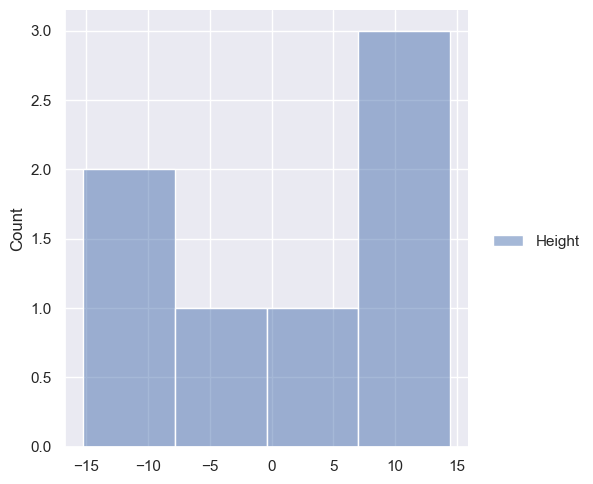

In [59]:
sns.displot(data=residuals)

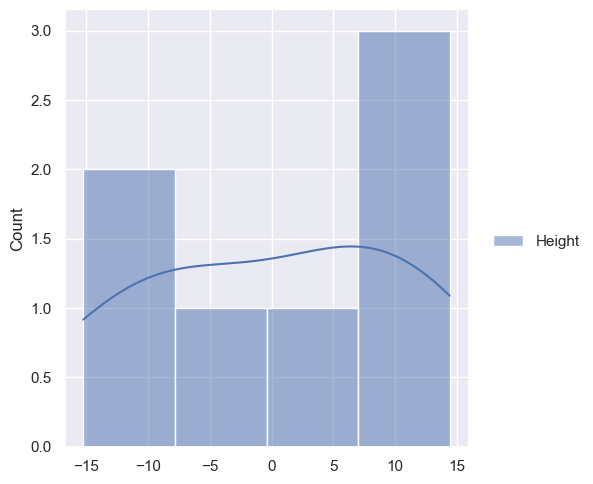

In [60]:
sns.displot(data=residuals,kde=True)

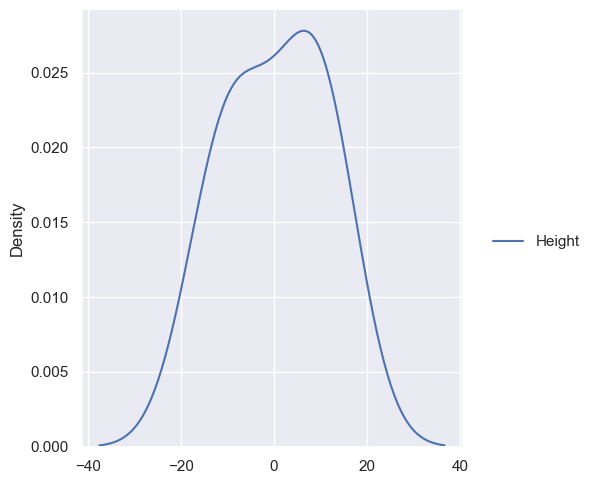

In [61]:
## To plot the distribution of residuals 

sns.displot(data=residuals,kind="kde")

# As you can see the residuals data almost following the normal distribution.

<Axes: ylabel='Count'>

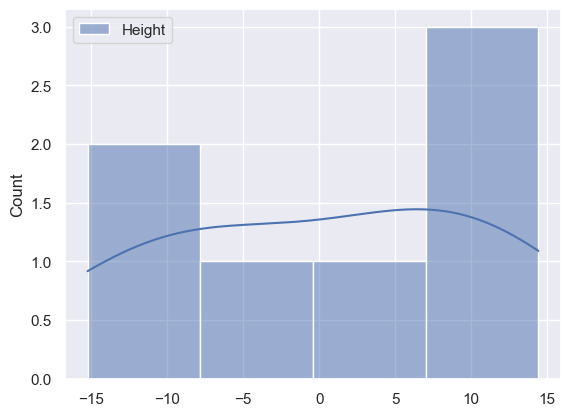

In [62]:
sns.histplot(residuals,kde=True)

# distribution is not clear in histplot, use displot instead

3. Scatter plot between the residuals and the y_test and the residuals will be a **Uniform distribution**

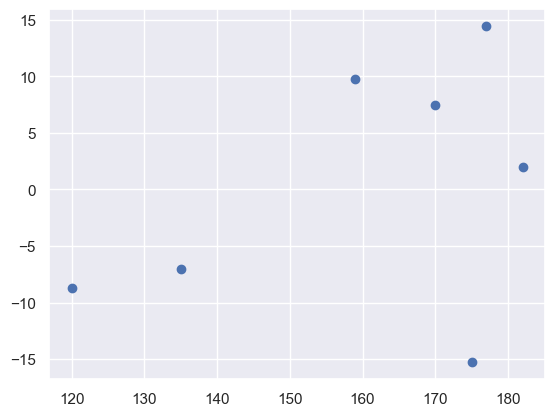

In [63]:
plt.scatter(y_test, residuals)

## As we can see the below one is not a uniform distribution as it splitted data in positive and negative side.
## please refer the below snippet with heading perfect unform distribution for the reference to know the perfect uniform distribution.

**Perfect uniform distribution:**

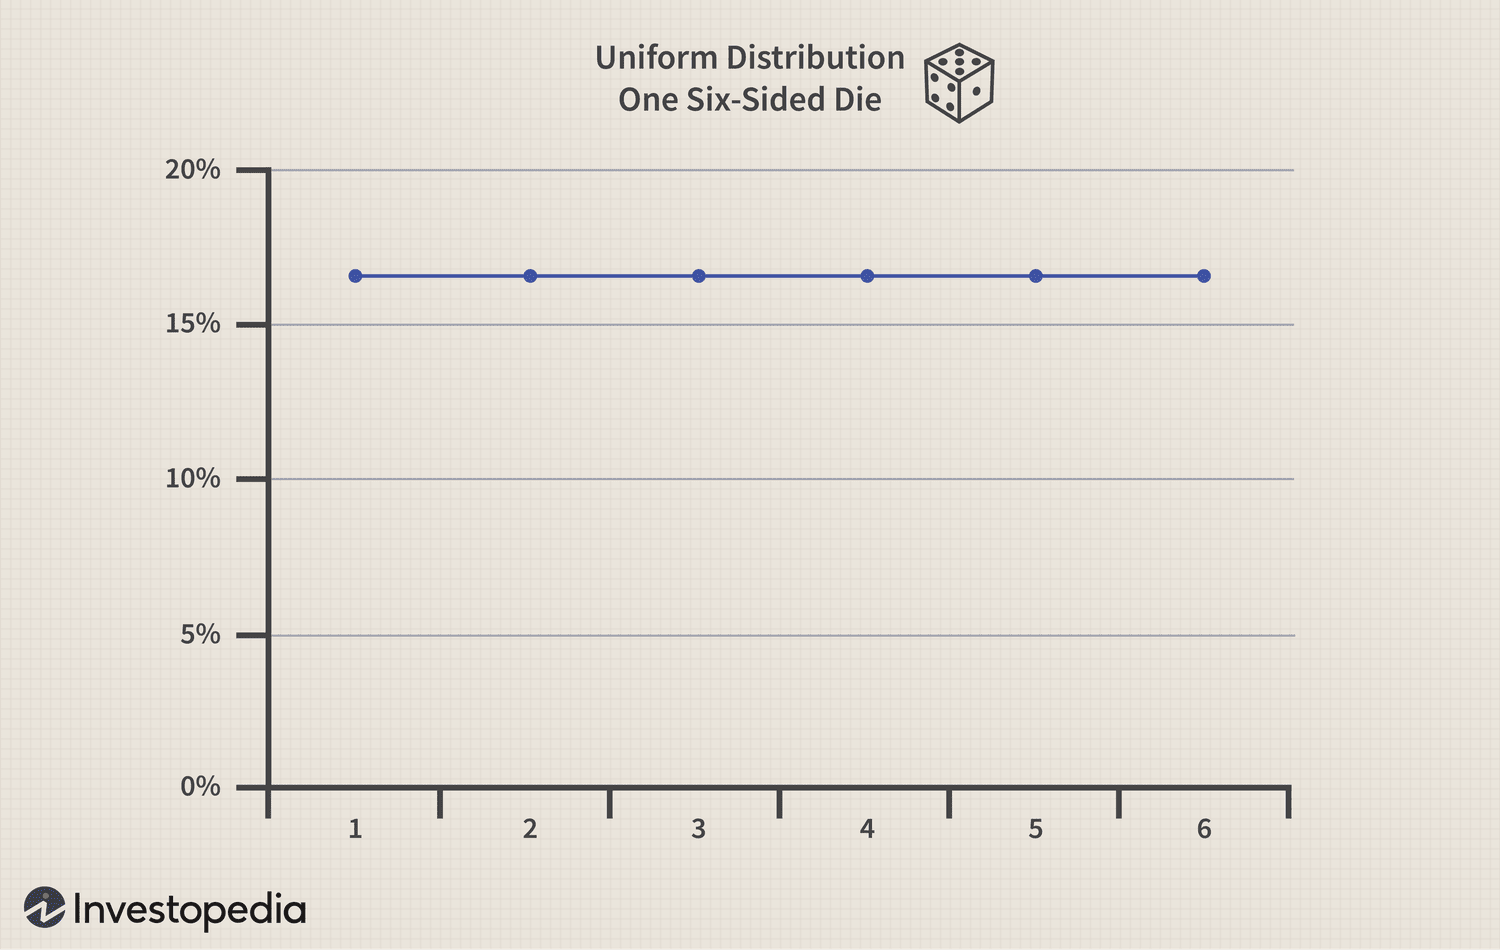

### Assumptions of linear regression {From ChatGPT}

Linear regression makes several key assumptions, and it's important to be aware of these assumptions when applying the model. Here are the main assumptions of the classical linear regression model:

**Linearity:** The relationship between the independent variable(s) and the dependent variable is assumed to be linear. This means that changes in the independent variable(s) are associated with constant and proportional changes in the dependent variable.

**Independence:** The observations are assumed to be independent of each other. This means that the value of the dependent variable for one observation should not be dependent on the value of the dependent variable for any other observation.

**Homoscedasticity:** The variance of the residuals (the differences between the observed and predicted values) should be constant across all levels of the independent variable(s). In other words, the spread of the residuals should remain roughly the same across different values of the independent variable(s).

**Normality of Residuals:** The residuals (the differences between the observed and predicted values) should be approximately normally distributed. This assumption is more critical for smaller sample sizes. However, for larger sample sizes, the Central Limit Theorem often helps mitigate deviations from normality.

**No Perfect Multicollinearity:** In multiple linear regression (when there are multiple independent variables), there should not be exact linear relationships among the independent variables. This situation is known as multicollinearity, and it can make it challenging to isolate the individual effects of each independent variable.

**No Autocorrelation:** The residuals should not exhibit a pattern in their distribution over time or across observations. Autocorrelation (or serial correlation) occurs when the residuals at one point in time are correlated with the residuals at another point in time.

**No Endogeneity:** The independent variables are assumed to be exogenous, meaning they are not influenced by the dependent variable. Endogeneity can introduce bias into the estimates.

**Scale of Measurement:** The variables involved should be measured on an interval or ratio scale. This is to ensure that the concept of "adding" or "subtracting" makes sense in the context of the model.

It's essential to check these assumptions when using linear regression, as violations of these assumptions can lead to biased estimates and inaccurate inferences. Various diagnostic tools, such as residual plots and statistical tests, can help assess the validity of these assumptions.

In [64]:
## we can use pickle concept as well (Let's discuss this function after the multi)

"Pickling" a model refers to the process of serializing the model object into a format that can be easily saved to a file or transmitted over a network. The term "pickling" comes from the Python programming language, which has a standard library module called pickle for this purpose.

In the context of machine learning, pickling a model allows you to save the trained model to a file so that you can later load it and use it for making predictions on new data without having to retrain the model. This is particularly useful when you have invested time and computational resources into training a model, and you want to deploy or share that model without going through the training process again.

Here's a simple example using Python's pickle module to pickle and unpickle a trained model:

In [65]:
import pickle
from sklearn.linear_model import LinearRegression

# Assume you have a trained model
model = LinearRegression()
# ... train the model ...

# Pickle the model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Now, you can later unpickle and use the model
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
# ... make predictions with loaded_model ...


In this example, the pickle.dump() function is used to serialize the model and save it to a file named 'trained_model.pkl'. Later, the pickle.load() function is used to deserialize the model from the file, allowing you to use the loaded model for predictions.

It's worth noting that while pickling is a convenient way to save and load models, it might not be the most efficient or secure method, especially when dealing with untrusted sources. For more advanced use cases or deployment scenarios, you might consider other serialization formats or tools.

In [66]:
## <--------------------------------------------- END OF NOTEBOOK ------------------------------------------------------------->